# IT Academy - Data Science with Python
## Sprint 12: Supervised Regressions
### [Github Supervised Regressions](https://github.com/jesussantana/Supervised-Regression)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Supervised-Regression.svg)](https://wakatime.com/badge/github/jesussantana/Supervised-Regression)

In [42]:
import pandas as pd
import numpy as np
import warnings

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

plt.figure(figsize=(16, 6))
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')

<Figure size 1152x432 with 0 Axes>

In [43]:
df_raw = pd.read_csv("../data/raw/DelayedFlights.csv")

### Exercise 1: 
  - Create at least three different regression models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

### Linear Regression

In [44]:
df = df_raw.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [45]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
955818,3211671,2008,6,29,7,1644.0,1515,1734.0,1601,OO,...,1.0,13.0,0,N,0,89.0,0.0,4.0,0.0,0.0
327742,1036135,2008,2,15,5,1051.0,1015,1404.0,1252,9E,...,38.0,30.0,0,N,0,0.0,0.0,36.0,0.0,36.0
1033449,3459166,2008,6,23,1,1344.0,1320,1505.0,1426,9E,...,30.0,9.0,0,N,0,0.0,0.0,15.0,0.0,24.0
172810,563389,2008,1,12,6,1852.0,1745,2117.0,2028,CO,...,4.0,17.0,0,N,0,49.0,0.0,0.0,0.0,0.0
918278,3087280,2008,6,30,1,758.0,750,843.0,835,WN,...,4.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [46]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [47]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#Beta coefficient
print("Coefficients: ", regr.coef_)  
Y_pred = regr.predict(X)
print("R Square: ", r2_score(Y, Y_pred))

Coefficients:  [1.0148088]
R Square:  0.9058863720295741


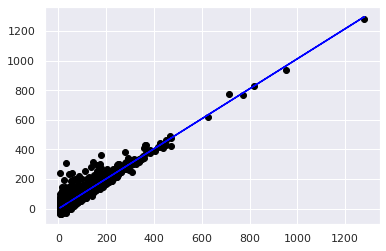

In [48]:
plt.scatter(X[1:10000], Y[1:10000], color = "black") 
plt.plot(X[1:10000], Y_pred[1:10000], color = "Blue")  
plt.show()

### Logistical Regression

In [49]:
df = df_raw.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"] > 30  # True = 1 / False= 0 // Interpretacion: Vuelos sin retraso Notable
X = df[["ArrTime"]]

In [50]:
logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X)

In [51]:
np.round(logreg.predict_proba(X),3)

array([[0.587, 0.413],
       [0.589, 0.411],
       [0.558, 0.442],
       ...,
       [0.58 , 0.42 ],
       [0.568, 0.432],
       [0.564, 0.436]])

In [52]:
np.mean(Y_pred == Y)  # 88% correcto, comprobaremos si estan compensadas con la siguiente instruccion

0.57098

In [53]:
np.mean(Y) # no es tan bueno como parecia el modelo

0.42902

In [54]:
confusion_matrix = confusion_matrix(Y,Y_pred)
print(confusion_matrix)

[[57098     0]
 [42902     0]]


### Naive Bayes

In [55]:
df = df.dropna(subset=["ArrDelay"])

In [56]:
Y = df["ArrDelay"] > 0

In [57]:
df["Month"] = df["Month"].apply(str) # convertimos en string para que sean categoricas 
df["DayofMonth"] = df["DayofMonth"].apply(str) 
df["DayOfWeek"] = df["DayOfWeek"].apply(str) 
df["TailNum"] = df["TailNum"].apply(str) 

X = pd.get_dummies(data=df[['Month','DayofMonth','TailNum','DayOfWeek', 'Origin', 'Dest', 'UniqueCarrier']])

In [58]:
X.head()

,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
1925335,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1664950,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1385072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50854,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
405110,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
# Ajustar el modelo
clf= BernoulliNB()
#clf = MultinomialNB()
clf.fit(X,Y)
Y_pred = clf.predict(X)

In [60]:
np.mean(Y == Y_pred)

0.8916

In [61]:
X = df[['AirTime','Distance','ArrDelay','TaxiOut']] #DepDelay
clf = GaussianNB()
clf.fit(X,Y)
Y_pred = clf.predict(X)

In [62]:
np.mean(Y == Y_pred)

0.95005

### K-Nearest-Neihbours


In [63]:
newdf = df[["AirTime", "Distance", "TaxiOut", "ArrDelay"]].dropna()
cols = newdf[newdf.columns[newdf.columns != "ArrDelay"]]

In [64]:
filtro = newdf["ArrDelay"] > 10 # variable respuesta binaria

In [65]:
newdf["ArrDelay"][filtro] = "Delayed"
newdf["ArrDelay"][filtro == False] = "Not Delayed"  #añadimos etiquetas para visualizarlo

In [66]:
newdf["ArrDelay"].head()

1925335        Delayed
1664950    Not Delayed
1385072        Delayed
50854      Not Delayed
405110     Not Delayed
Name: ArrDelay, dtype: object

In [67]:
nbrs_3 = KNeighborsClassifier(n_neighbors=3, n_jobs = -1) # especificar numero de vecinos del modelo

In [68]:
nbrs_3.fit(cols, newdf["ArrDelay"])

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [69]:
predicciones_3 = nbrs_3.predict(cols) # hemos clasificado correctamente el 

In [70]:
np.mean(predicciones_3 == newdf["ArrDelay"]) # hemos clasificado correctamente casi el 80% de los datos

0.82024

In [71]:
np.mean(newdf["ArrDelay"] == "Not Delayed") # el modelo mejoro en mas d eun 50% la prediccion

0.28413

In [72]:
nbrs_1 = KNeighborsClassifier(n_neighbors=1, n_jobs = -1)  #probamos a ver con un solo vecino
nbrs_1.fit(cols, newdf["ArrDelay"])
predicciones_1 = nbrs_1.predict(cols)
np.mean(predicciones_1 == newdf["ArrDelay"]) # mejora un 2% con un solo vecino

0.94523

In [73]:
np.mean(newdf["ArrDelay"] == "Not Delayed")

0.28413

In [74]:

#confusion_matrix = confusion_matrix(newdf["ArrDelay"], predicciones_1)

### Random Forest

In [75]:
df = df.dropna(subset=["ArrDelay"])
df = df.sample(frac=1) # mezclamos
dftest = df.tail(500000)
df = df.head(500000)

In [76]:
clf = tree.DecisionTreeClassifier()

X = df[["Distance","AirTime",'DepTime','TaxiIn','TaxiOut','DepDelay']]
X_test = dftest[["Distance","AirTime",'DepTime','TaxiIn','TaxiOut','DepDelay']]
Y = df["ArrDelay"] > 10
Y_test = dftest["ArrDelay"] > 10

# Entrenamos el modelo
clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

np.mean(Y_test == Y_pred_test)

1.0

In [77]:
clf = RandomForestClassifier(n_estimators= 100, n_jobs= -1) #genere 100 arboles y todos los nucleos
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

clf.feature_importances_
# n_estimators / max_features / bootstrap / n_jobs

array([0.12291778, 0.10897851, 0.1076531 , 0.05991951, 0.12631106,
       0.47422004])

In [78]:
np.mean(Y_test == Y_pred_test) #mejora un 4% el modelo de prediccion

0.99998

In [79]:
#RandomForestRegressor()

### Exercise 2: 
  - Compare them based on MSE and R2.